# <span style="color:#4682B4">**Compute Value at Risk (VaR) with Monte Carlo**</span>

## <span style="color:#4682B4">**Table of Contents**</span>

1. [<span style="color:#4682B4">Introduction</span>](#introduction)
2. [<span style="color:#4682B4">Import Required Libraries</span>](#import-required-libraries)
3. [<span style="color:#4682B4">Create a Portfolio of Sector ETFs</span>](#create-portfolio)
4. [<span style="color:#4682B4">Create the Covariance Matrix</span>](#covariance-matrix)
5. [<span style="color:#4682B4">Set Up the Simulation</span>](#setup-simulation)
6. [<span style="color:#4682B4">Simulate Correlated Portfolio Paths</span>](#simulate-portfolio)
7. [<span style="color:#4682B4">Calculate Value at Risk (VaR) and Conditional Value at Risk (CVaR)</span>](#calculate-var)
8. [<span style="color:#4682B4">Visualise Simulated Portfolio Paths and Risk Metrics</span>](#visualise-portfolio)
9. [<span style="color:#4682B4">Conclusion</span>](#conclusion)
10. [<span style="color:#4682B4">Appendix</span>](#appendix)
    - [<span style="color:#4682B4">10.1: Value at Risk (VaR): Formula and Explanation</span>](#var-formula)
    - [<span style="color:#4682B4">10.2: Conditional Value at Risk (CVaR): Formula and Explanation</span>](#cvar-formula)
    - [<span style="color:#4682B4">10.3: Comparison of VaR and CVaR</span>](#comparison-var-cvar)
    - [<span style="color:#4682B4">10.4: Monte Carlo Simulation</span>](#monte-carlo-simulation)

## <span style="color:#4682B4">**1. Introduction**</span> <a id="introduction"></a>
In this section, we simulate **1,000 portfolio paths** to calculate two key financial metrics:  
- **Value at Risk (VaR)**: A measure of the potential loss in value of a portfolio over a defined period for a given confidence interval. ([See Appendix 10.1](#var-formula))

- **Conditional Value at Risk (CVaR)**: The expected loss exceeding the VaR. ([See Appendix 10.2](#cvar-formula))

This process will be implemented in Python using just a few lines of code.

## <span style="color:#4682B4">**2. Import Required Libraries**</span> <a id="import-required-libraries"></a>
To begin, we need to import the necessary libraries for the analysis:

- **NumPy**: Used for numerical computations. ([NumPy: documentation](https://numpy.org/doc/))
- **Pandas**: Used for data manipulation and analysis. ([Pandas: documentation](https://pandas.pydata.org/docs/))
- **OpenBB**: Used to retrieve historical financial data. ([OpenBB: documentation](https://docs.openbb.co/))

In [1]:
# Import libraries
import numpy as np              # For numerical computations
import pandas as pd             # For data manipulation and analysis
from openbb import obb          # To fetch historical financial data

## <span style="color:#4682B4">**3. Create a Portfolio of Sector ETFs**</span> <a id="create-portfolio"></a>

In this step, we create a portfolio of sector **Exchange-Traded Funds (ETFs)**, consisting of approximately 25 ETFs. An **ETF** is an investment fund traded on stock exchanges, holding a collection of assets such as stocks or bonds and typically tracking an index. Each ETF in this portfolio represents a different sector within the equity markets. For example, the **XLE** ETF focuses on the energy sector, holding stocks of companies involved in oil, gas, and energy equipment services. By utilising the **OpenBB** library, we fetch historical price data for these ETFs over the past couple of years. This data is then organised into a **DataFrame** for analysis.

### **Key Points:**
1. Define the list of sector ETFs, representing various equity market sectors.
2. Retrieve historical price data using OpenBB's `equity.price.historical()` function. The data source is [**Yahoo Finance**](https://finance.yahoo.com/).
3. The historical data spans from **2022-01-01** to the present and is organised into a DataFrame for further analysis.

In [ ]:
# 1. Define the list of sector ETFs
sectors = [
    "XLE", "XLF", "XLU", "XLI", "GDX", "XLK", "XLV", "XLY",
    "XLP", "XLB", "XOP", "IYR", "XHB", "ITB", "VNQ", "GDXJ",
    "IYE", "OIH", "XME", "XRT", "IBB", "SMH", "KBE", "KRE", "XTL"
] 

# 2. Fetch historical price data for the ETFs
data = obb.equity.price.historical(
    sectors,
    start_date="2022-01-01",             # Start date for historical data.
    provider="yfinance"                  # Data source: Yahoo Finance.
).to_df()

# 3. Display the resulting DataFrame

,open,high,low,close,volume,split_ratio,dividend,symbol
date,,,,,,,,
2022-01-03,31.420000,31.530001,31.209999,31.250000,18828900,0.0,0.0,GDX
2022-01-03,41.270000,41.490002,40.950001,41.029999,6289900,0.0,0.0,GDXJ
2022-01-03,152.309998,152.490005,149.339996,152.369995,3753900,0.0,0.0,IBB
2022-01-03,83.040001,83.040001,80.199997,80.690002,3179600,0.0,0.0,ITB
2022-01-03,30.120001,31.020000,30.120001,31.000000,3693600,0.0,0.0,IYE
...,...,...,...,...,...,...,...,...
2024-12-20,226.039993,232.240005,225.520004,231.529999,2056812,0.0,0.0,XLY
2024-12-20,56.540001,57.750000,56.470001,57.630001,811641,0.0,0.0,XME
2024-12-20,124.919998,127.480003,124.529999,127.260002,1131437,0.0,0.0,XOP


### **Result:**
The resulting **DataFrame** contains the historical price data for each sector ETF, including columns such as:
- **Open, High, Low, Close**: The prices for each trading day.
- **Volume**: The number of shares traded.
- **Symbol**: The ETF ticker symbol.

This organised data serves as the foundation for portfolio analysis.

## <span style="color:#4682B4">**4. Create the Covariance Matrix**</span> <a id="covariance-matrix"></a>

The **covariance matrix** is a crucial component in portfolio analysis. It describes how the returns of the assets (sector ETFs in this case) are related to each other, providing insight into their correlations. This step involves calculating the daily returns for each ETF, aggregating basic portfolio statistics, and then constructing the covariance matrix.

### **Key Points:**
1. **Daily Returns Calculation**:
   - The daily returns for each ETF are calculated as the percentage change in the closing prices.

2. **Portfolio Statistics**:
   - Basic statistics, such as the mean daily return, are aggregated for each ETF.
   - Equal weights are assigned to all ETFs for simplicity.

3. **Covariance Matrix**:
   - The `pivot()` function is used to rearrange the data into a format where each column represents the daily returns of an ETF.
   - The covariance matrix is computed using the `.cov()` function after dropping rows with missing values.

In [ ]:
# 1. Calculate daily returns for each ETF
data["returns"] = data.groupby("symbol").close.pct_change()

# 2. Calculate portfolio statistics
portfolio_stats = data.groupby("symbol").agg(
    daily_returns=("returns", "mean"),              # Mean daily return for each ETF
)

# Assign equal weights to all ETFs
portfolio_stats["weights"] = 1 / len(sectors)

# 3. Create the covariance matrix
covariance_matrix = (
    data
    .pivot(
        columns="symbol",                           # Columns represent ETF symbols
        values="returns"                            # Values are the daily returns
    )
    .dropna()                                       # Drop rows with missing values
    .cov()                                          # Calculate covariance matrix
)

# Display the covariance matrix
covariance_matrix

symbol,GDX,GDXJ,IBB,ITB,IYE,IYR,KBE,KRE,OIH,SMH,...,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,XRT,XTL
symbol,,,,,,,,,,,,,,,,,,,,,
GDX,0.000474,0.000527,0.000100,0.000129,0.000123,0.000114,0.000063,0.000056,0.000168,0.000132,...,0.000076,0.000098,0.000055,0.000096,0.000059,0.000099,0.000264,0.000152,0.000106,0.000100
GDXJ,0.000527,0.000614,0.000123,0.000158,0.000154,0.000134,0.000089,0.000082,0.000212,0.000173,...,0.000097,0.000125,0.000062,0.000106,0.000069,0.000129,0.000321,0.000194,0.000137,0.000130
IBB,0.000100,0.000123,0.000193,0.000165,0.000063,0.000115,0.000132,0.000136,0.000086,0.000174,...,0.000098,0.000142,0.000055,0.000065,0.000094,0.000149,0.000136,0.000090,0.000168,0.000140
ITB,0.000129,0.000158,0.000165,0.000365,0.000081,0.000173,0.000196,0.000201,0.000109,0.000242,...,0.000147,0.000183,0.000074,0.000091,0.000094,0.000212,0.000192,0.000119,0.000260,0.000180
IYE,0.000123,0.000154,0.000063,0.000081,0.000274,0.000073,0.000129,0.000133,0.000344,0.000098,...,0.000090,0.000073,0.000034,0.000057,0.000046,0.000079,0.000209,0.000326,0.000101,0.000094
IYR,0.000114,0.000134,0.000115,0.000173,0.000073,0.000171,0.000139,0.000144,0.000090,0.000133,...,0.000101,0.000116,0.000067,0.000104,0.000078,0.000132,0.000137,0.000096,0.000149,0.000131
KBE,0.000063,0.000089,0.000132,0.000196,0.000129,0.000139,0.000335,0.000367,0.000195,0.000187,...,0.000144,0.000145,0.000059,0.000073,0.000076,0.000174,0.000211,0.000175,0.000224,0.000176
KRE,0.000056,0.000082,0.000136,0.000201,0.000133,0.000144,0.000367,0.000409,0.000203,0.000187,...,0.000148,0.000144,0.000059,0.000074,0.000075,0.000177,0.000218,0.000182,0.000235,0.000184
OIH,0.000168,0.000212,0.000086,0.000109,0.000344,0.000090,0.000195,0.000203,0.000537,0.000149,...,0.000129,0.000105,0.000036,0.000063,0.000053,0.000109,0.000299,0.000423,0.000145,0.000131


### **Result:**
- The **covariance matrix** provides pairwise covariance values between the daily returns of the ETFs in the portfolio.
- This matrix forms the basis for risk assessment and optimisation in portfolio management.

## <span style="color:#4682B4">**5. Set Up the Simulation**</span> <a id="setup-simulation"></a>

To calculate the **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)**, we need to set up the simulation environment. This involves creating numpy arrays to store simulation results and historical returns.

### **Key Points:**
1. **Number of Simulations**:
   - The simulation involves running a set number of portfolio paths (e.g., 100).

2. **Simulation Period**:
   - The number of days is derived from the unique indices in the dataset, representing the trading days in the historical data.

3. **Initial Portfolio Capital**:
   - An initial capital of **$100,000** is used for the portfolio.

4. **Portfolio Array**:
   - An empty NumPy array is created to store portfolio values for each day and simulation.

5. **Historical Returns**:
   - A NumPy array is initialised to store the historical mean returns for each ETF.

In [4]:
# 1. Number of Simulations
simulations = 100                                   # The simulation involves 100 portfolio paths.

# 2. Simulation Period
days = len(data.index.unique())                     # The number of unique trading days in the historical data.

# 3. Initial Portfolio Capital
initial_captial = 100_000                           # The initial capital allocated to the portfolio.

# 4. Portfolio Array
portfolio = np.zeros((days, simulations))           # An empty NumPy array to store portfolio values for each day and simulation.

# 5. Historical Returns
historical_returns = np.full(
    shape=(days, len(sectors)),                     # Array shape matches the number of trading days and ETFs.
    fill_value=portfolio_stats.daily_returns        # Filled with mean daily returns for each ETF.
)

### **Result:**
- **Portfolio Array**: A matrix with dimensions `(days, simulations)` to store simulated portfolio values over time.
- **Historical Returns Array**: A matrix where each entry corresponds to the mean daily return for an ETF.

These arrays serve as the foundation for running the portfolio simulations.

## <span style="color:#4682B4">**6. Simulate Correlated Portfolio Paths**</span> <a id="simulate-portfolio"></a>

To simulate realistic portfolio paths, we use the **Cholesky decomposition** on the covariance matrix. This technique generates a series of normally distributed paths that are **correlated** based on the covariance matrix, better reflecting real-world asset behaviour.

### **Key Points:**
1. **Cholesky Decomposition**:
   - The **Cholesky decomposition** of the covariance matrix produces a lower triangular matrix (**L**) that captures the correlations between the assets.
   - This ensures the simulated daily returns respect the historical covariance between the ETFs.

2. **Generating Correlated Daily Returns**:
   - For each simulation:
     - Random paths are generated from a normal distribution using `np.random.normal`.
     - The random values are transformed via the Cholesky matrix to introduce correlations.
     - The transformed returns are scaled by the historical mean daily returns.

3. **Portfolio Simulation**:
   - The portfolio value is updated over time using the cumulative product of daily returns, adjusted by weights and scaled by the initial capital.

4. **Simulated Portfolio DataFrame**:
   - A DataFrame is created to store the simulated portfolio values for further analysis.

In [5]:
# 1. Cholesky Decomposition
L = np.linalg.cholesky(covariance_matrix)                       # Decompose the covariance matrix to capture asset correlations.

# 2. Generating Correlated Daily Returns
for i in range(simulations):                                    # Loop through each simulation.
    Z = np.random.normal(size=(days, len(sectors)))             # Generate random normal paths.
    daily_returns = historical_returns + np.dot(L, Z.T).T       # Transform random paths with Cholesky matrix and add historical mean returns.

# 3. Portfolio Simulation
    portfolio[:, i] = (
        np.cumprod(np.dot(daily_returns, portfolio_stats.weights) + 1) * initial_captial
    )  

# 4. Simulated Portfolio DataFrame
simulated_portfolio = pd.DataFrame(portfolio)                   # Store simulated portfolio values in a DataFrame for analysis.

### **Result:**
- **Simulated Portfolio Values**: The resulting DataFrame contains simulated portfolio values for each day (`rows`) and simulation (`columns`).
- **Correlated Returns**: The portfolio paths reflect the correlations between assets, providing a more realistic simulation of portfolio behaviour.

This step ensures that the simulated portfolio paths account for the covariance and correlation between assets, making the results more aligned with real-world scenarios.

## <span style="color:#4682B4">**7. Calculate Value at Risk (VaR) and Conditional Value at Risk (CVaR)**</span> <a id="calculate-var"></a>

In this step, we calculate two essential risk metrics using the **Monte Carlo simulation results**. ([See Appendix 10.4](#monte-carlo-simulation))
- **Value at Risk (VaR)**: The maximum loss expected with a given confidence level (e.g., 95%).
- **Conditional Value at Risk (CVaR)**: The expected loss beyond the VaR threshold, representing the average of the worst losses.

Both metrics are calculated based on the simulated portfolio values at the final day of each simulation.

### **Key Points:**

1. **Confidence Level**:
   - The variable `alpha` is set to **5%**, defining the confidence level for calculating VaR and CVaR.  
   - For example, at **alpha = 5%**, VaR corresponds to the 5th percentile of portfolio outcomes.

2. **Monte Carlo VaR Function**:
   - The `montecarlo_var()` function calculates the **Value at Risk (VaR)** by finding the alpha-th percentile of simulated portfolio values on the last day.

3. **Conditional VaR Function**:
   - The `conditional_var()` function calculates the **Conditional Value at Risk (CVaR)** by averaging all simulated portfolio values that fall below or equal to the VaR threshold.


In [6]:
# 1. Confidence Level
alpha = 5                                                       # Confidence level for calculating VaR and CVaR.

# 2. Monte Carlo VaR
def montecarlo_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]                   # Simulated portfolio values on the last day.
    return np.percentile(sim_val, alpha)                        # Calculate the alpha-th percentile (VaR).

# 3. Conditional VaR
def conditional_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]                   # Simulated portfolio values on the last day.
    return sim_val[sim_val <= montecarlo_var(alpha)].mean()     # Calculate the mean of values below or equal to VaR.

### **Result:**
- **Monte Carlo VaR**: Returns the portfolio value at the $\alpha^{th}$ percentile, representing the maximum loss expected with a certain confidence level.
- **Conditional VaR**: Provides the mean of all portfolio values below the VaR threshold, giving a measure of the average extreme loss.

By combining these metrics, we gain a comprehensive understanding of portfolio risk.

## <span style="color:#4682B4">**8. Visualise Simulated Portfolio Paths and Risk Metrics**</span> <a id="visualise-portfolio"></a>

In this final step, we plot the results of the Monte Carlo simulation to visualise the portfolio paths and highlight the calculated risk metrics:
- **Portfolio Paths**: Each line represents a different simulated scenario of the portfolio over time.
- **Value at Risk (VaR)**: Represented by a red horizontal line, indicating the worst loss expected within a certain confidence level.
- **Conditional Value at Risk (CVaR)**: Represented by a green horizontal line, showing the average loss beyond the VaR threshold.

### **Key Points:**
1. **Monte Carlo VaR and CVaR**:  
   - The calculated metrics (`mc_var` for VaR and `cond_var` for CVaR) are used to identify the risk thresholds.
   - These are determined from the simulation results on the final day.

2. **Portfolio Path Plot**:  
   - The line `simulated_portfolio.plot()` generates a plot where each line corresponds to a simulation, showing the range of potential portfolio outcomes.

3. **Risk Metric Indicators**:  
   - A **<span style="color:red">red</span> horizontal line** indicates the VaR ($\alpha^{th}$ percentile of outcomes).
   - A **<span style="color:green">green</span> horizontal line** indicates the CVaR (average of losses beyond VaR), providing additional insight into tail risk.

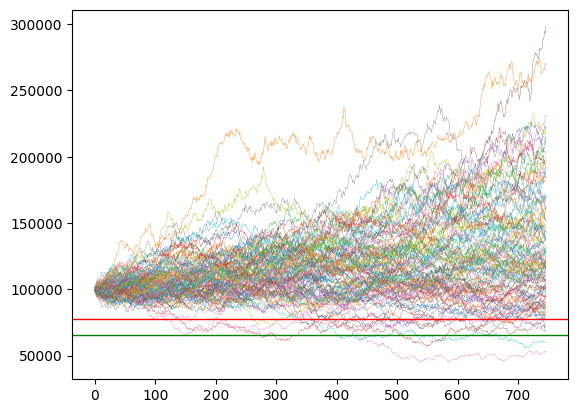

In [8]:
# 1. Monte Carlo VaR and CVaR
mc_var = montecarlo_var(alpha)                          # Calculate Value at Risk (VaR)
cond_var = conditional_var(alpha)                       # Calculate Conditional Value at Risk (CVaR)

# 2. Portfolio Path Plot
ax = simulated_portfolio.plot(lw=0.25, legend=False)    # Plot portfolio paths with thin lines

# 3. Risk Metric Indicators
ax.axhline(mc_var, lw=1.0, c="r")                       # Add a red line for VaR
ax.axhline(cond_var, lw=1.0, c="g")                     # Add a green line for CVaR

### **Result:**
The resulting plot contains:
- **Thousands of portfolio paths** representing different scenarios based on the Monte Carlo simulation.
- A **<span style="color:red">red</span>  line** indicating the VaR threshold at approximately **75,000**, representing the worst loss expected with a 95% confidence level.  
- A **<span style="color:green">green</span> line** showing the CVaR at approximately **65,000**, representing the average loss in the worst 5% of cases.

**Intuitive Interpretation**:
- The **<span style="color:red">red</span> linr (VaR)** means that under normal market conditions, the portfolio is expected to lose no more than **75,000** in value with a 95% confidence level.
- The **<span style="color:green">green</span> linr (CVaR)** provides a deeper insight, showing that if losses exceed the VaR threshold, the average loss will be around **65,000**.

This visualisation provides a clear understanding of the potential risks and extreme losses in the portfolio, helping to assess its vulnerability under adverse conditions.

## <span style="color:#4682B4">**9. Conclusion**</span> <a id="conclusion"></a>

In this notebook, we demonstrated the use of **Monte Carlo simulations** to analyse portfolio risk, focusing on:
- Simulating portfolio paths with correlated returns based on a covariance matrix.
- Calculating key risk metrics: **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)**.
- Visualising thousands of portfolio paths alongside the VaR and CVaR thresholds.

### **Key Takeaways**:
1. **Realistic Portfolio Behavior**:
   - Using the covariance matrix and Cholesky decomposition ensures that the simulated returns account for correlations between assets, making the analysis more aligned with real-world scenarios.

2. **Risk Metrics**:
   - The calculated **VaR** provides a threshold for potential losses at a given confidence level.
   - The **CVaR** offers additional insight by estimating the average of extreme losses.

3. **Visualisation**:
   - The final plot highlights the range of potential portfolio outcomes and their associated risks, aiding in decision-making and risk management.

This workflow provides a solid foundation for assessing portfolio risk and can be extended with more advanced techniques or applied to different asset classes.

## <span style="color:#4682B4">**10. Appendix**</span> <a id="appendix"></a>

### **<span style="color:#4682B4">**10.1**</span>: Value at Risk (VaR): Formula and Explanation** <a id="var-formula"></a>

**Definition:**  
The **Value at Risk (VaR)** at a confidence level $ \alpha $ represents the maximum potential loss of a portfolio over a given period, with a confidence of $ 1 - \alpha $. It answers the question: *"What is the worst loss I can expect, under normal market conditions, at a given confidence level?"*

**Formula:**
$$
\text{VaR}_\alpha = \inf \{ x \in \mathbb{R} : F(x) \geq \alpha \}
$$

Where:
- $ F(x) $: The cumulative distribution function (CDF) of portfolio losses.
- $ \alpha $: The confidence level (e.g., 95% confidence means a 5% risk of exceeding this loss).

In simpler terms, $ \text{VaR}_\alpha $ is the loss at the $ \alpha^{th} $ percentile of the loss distribution. 

**Intuitive Example:**  
Imagine you are managing a portfolio worth **$100,000**, and based on historical data:
- There is a **95% confidence** that your losses over one day will not exceed **$5,000**.

In this case:
- The **VaR** at $ \alpha = 5\% $ is **$5,000**.
- This means that on 5% of days, under normal conditions, you could lose more than $5,000.

#### **How to Interpret VaR**:
- A **VaR of $5,000 at 95% confidence** means:
  - There is a 95% probability that your losses will be **less than or equal to $5,000** in one day.
  - There is a 5% probability of losing **more than $5,000**.

By focusing on the worst-case losses with a specific probability, VaR provides a quantifiable measure of risk that helps investors and risk managers prepare for potential downside scenarios.

### **<span style="color:#4682B4">**10.2**</span>: Conditional Value at Risk (CVaR): Formula and Explanation** <a id="cvar-formula"></a>

**Definition:**  
The **Conditional Value at Risk (CVaR)**, also called the **expected shortfall**, is the **average loss** you can expect when losses exceed the Value at Risk (VaR) threshold. While VaR identifies a threshold, CVaR quantifies how bad things can get beyond that threshold.

**Formula:**
$$
\text{CVaR}_\alpha = \mathbb{E}[L | L \geq \text{VaR}_\alpha]
$$

Where:
- $ \mathbb{E}[L] $: The expected (average) value of portfolio losses $ L $.
- $ L \geq \text{VaR}_\alpha $: The condition that losses are **greater than or equal to the VaR threshold**.

**Key Insight:**  
- **VaR vs. CVaR**:
  - **VaR** tells you the maximum loss at a specific confidence level (e.g., "5% of the time, losses will exceed $5,000").
  - **CVaR** tells you the average loss if things go worse than that threshold (e.g., "if losses exceed $5,000, they average $7,000").

**Intuitive Example:**  
Let’s say your portfolio is worth **$100,000**, and based on historical data:
- The **95% VaR** is **$5,000** (meaning there's a 5% chance losses exceed $5,000).
- The **CVaR** is **$7,000**.

This means:
- On **95% of days**, you won’t lose more than $5,000.
- However, on the **5% of days when you do lose more than $5,000**, your **average loss** will be **$7,000**.

#### **How to Interpret CVaR**:
- CVaR provides additional insight beyond VaR by focusing on the **severity of extreme losses**.
- It’s especially useful in risk management for **tail risk**: understanding what happens in the rare but impactful worst-case scenarios.

**Key Insight:**  
While VaR provides a threshold for the worst-case loss with a certain confidence level, CVaR gives a more comprehensive view by averaging all extreme losses beyond that threshold.


### **<span style="color:#4682B4">**10.3**</span>: Comparison of VaR and CVaR** <a id="comparison-var-cvar"></a>
| Metric           | Definition                                       | Strengths                              | Limitations                            |
|-------------------|-------------------------------------------------|----------------------------------------|----------------------------------------|
| **Value at Risk** | Threshold for potential loss with confidence $ \alpha $. | Simple and widely understood.          | Ignores losses beyond the threshold.    |
| **Conditional VaR** | Average of losses beyond the VaR threshold.    | Accounts for tail risk.                 | Computationally more intensive.         |

### **<span style="color:#4682B4">**10.4**</span>: Monte Carlo Simulation** <a id="monte-carlo-simulation"></a>

**Definition:**  
**Monte Carlo Simulation** is a computational method used to model the probability of various outcomes by repeatedly running simulations with random inputs. In portfolio analysis, it allows us to explore the range of possible portfolio outcomes by accounting for randomness in asset returns and their correlations.

**Key Idea:**  
Monte Carlo simulation uses random sampling to simulate thousands of portfolio paths, which helps in estimating **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)** by analysing the distribution of simulated portfolio outcomes.

#### **Key Formulae**

1. **Simulated Daily Returns**:
   $$
   R_t = \mu + \mathbf{L} \cdot Z_t
   $$
   - $ R_t $: Simulated daily returns vector for all assets at time $ t $.
   - $ \mu $: Vector of mean daily returns (historical averages).
   - $ \mathbf{L} $: Cholesky decomposition matrix of the covariance matrix (introduces correlations between assets).
   - $ Z_t $: Vector of random variables drawn from a standard normal distribution $( Z_t \sim N(0, 1) )$.

   **Explanation:**  
   This formula generates correlated daily returns for each asset, preserving the relationships between asset returns defined by the covariance matrix.

2. **Portfolio Value Evolution**:
   $$
   V_t = V_{t-1} \times (1 + w^\top \cdot R_t)
   $$
   - $ V_t $: Portfolio value at time $ t $.
   - $ V_{t-1} $: Portfolio value at the previous time step.
   - $ w $: Portfolio weights (proportions allocated to each asset).
   - $ R_t $: Simulated daily returns vector at time $ t $.

   **Explanation:**  
   The portfolio value evolves as the compounded effect of weighted daily returns over time.

#### **Intuitive Example**  
Imagine you're managing a portfolio worth **$100,000** with three assets (e.g., ETFs A, B, and C):
- Based on historical data, the **mean daily returns** are:
  - Asset A: 0.05%, Asset B: 0.03%, Asset C: 0.04%.
- The assets are **correlated**, so their returns influence each other.
- You run a **Monte Carlo Simulation** with 1,000 iterations to explore how the portfolio might perform over the next year.

Steps in the simulation:
1. Use historical **mean returns** $( \mu )$ and the **covariance matrix** to generate random correlated daily returns for each asset using Cholesky decomposition.
2. Compute the portfolio value for each day and iteration based on the random daily returns.
3. Analyse the results:
   - Estimate **VaR**: e.g., "The portfolio will lose more than $7,000 in 5% of scenarios."
   - Estimate **CVaR**: e.g., "If losses exceed $7,000, the average loss is $9,500."


#### **Advantages of Monte Carlo Simulation**
1. **Realism**: Incorporates randomness and correlations between assets, simulating realistic portfolio behavior.
2. **Flexibility**: Can handle complex portfolios with various asset classes and distributions.
3. **Insights**: Provides a probabilistic view of risks and outcomes, beyond simple averages.

#### **Disadvantages of Monte Carlo Simulation**
1. **Computational Complexity**: Requires significant computational power, especially for large portfolios or high-resolution simulations.
2. **Dependence on Assumptions**: Results are highly sensitive to assumptions about return distributions and correlations.
3. **Simplification**: Assumes stable relationships between assets, which may not hold during market stress.